In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from datetime import date, timedelta, datetime
import math
import requests
import io
%matplotlib inline

In [3]:
# Fetching Live Data from CSSE 
url_confirm="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
url_death = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
s_confirm = requests.get(url_confirm).content
s_death = requests.get(url_death).content
confirmed_df = pd.read_csv(io.StringIO(s_confirm.decode('utf-8')))
deaths_df = pd.read_csv(io.StringIO(s_death.decode('utf-8')))

In [4]:
confirmed_df.rename(columns={"Admin2": "County"}, inplace=True)
deaths_df.rename(columns={"Admin2": "County"}, inplace=True)

## Data from covidtracking.com

In [5]:
url_newyork_covidtracking = "https://covidtracking.com/api/v1/states/NY/daily.csv"
newyork = requests.get(url_newyork_covidtracking).content

In [6]:
newyork_df = pd.read_csv(io.StringIO(newyork.decode('utf-8')))

In [7]:
newyork_df["date"] = newyork_df["date"].apply(lambda x: datetime.strptime(str(x),"%Y%m%d"))

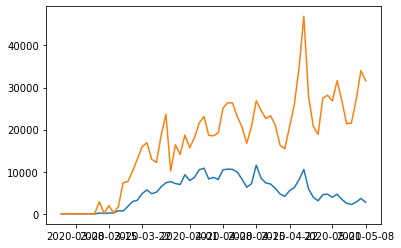

In [46]:
plt.plot(newyork_df["date"], np.array([newyork_df["positiveIncrease"],newyork_df["totalTestResultsIncrease"]]).T)
plt.show()

In [10]:
checknan = newyork_df["positiveIncrease"].apply(lambda x: math.isnan(x))

In [11]:
np.corrcoef(newyork_df[-checknan]["positiveIncrease"], newyork_df[-checknan]["totalTestResultsIncrease"])

array([[1.        , 0.68365251],
       [0.68365251, 1.        ]])

Test results increase has a 0.68 positive correlation to the increase in positive tests. 

## Backup

Data from: https://www.ahd.com/state_statistics.html

Data are based on each hospital's most recent Medicare cost report

In [37]:
hospital_data = pd.read_csv("hospitaldata_bystate.csv")
hospital_data["Number of Beds"] = hospital_data["Number of Beds"].apply(lambda x: int(x.replace(",","")))

In [41]:
hospital_data

,States,Number of Hospitals,Number of Beds
0,AK - Alaska,10,1235
1,AL - Alabama,89,15330
2,AR - Arkansas,52,7873
3,AS - American Samoa,1,0
4,AZ - Arizona,73,13416
5,CA - California,343,74624
6,CO - Colorado,55,8189
7,CT - Connecticut,34,8798
8,DC - Washington D.C.,7,2117
9,DE - Delaware,8,2072


Data from https://www.kff.org/other/state-indicator/distribution-by-age/

Notes: 2018 Data

"Population and demographic data on are based on analysis of the Census Bureau’s American Community Survey (ACS) and may differ from other population estimates published yearly by the Census Bureau. U.S. and state population data displayed on this site are restricted to the civilian, non-institutionalized population for whom ACS collects and reports poverty information.

Population numbers are rounded to the nearest 100."

In [35]:
agegroups = pd.read_csv("agedata_bystate.csv")

In [38]:
agegroups

,Location,Children 0-18,Adults 19-25,Adults 26-34,Adults 35-54,Adults 55-64,65+,Total
0,United States,75877700,28020700,39590700.0,81990600,41897600,51121200,318498500
1,Alabama,1128300,419500,554400.0,1192600,646800,811000,4752600
2,Alaska,191100,62200,93400.0,182800,94100,85500,709100
3,Arizona,1706300,645900,841100.0,1702900,862200,1245900,7004300
4,Arkansas,728600,255200,345400.0,722800,380200,489100,2921300
5,California,9324800,3594300,5299700.0,10212700,4737800,5576600,38745900
6,Colorado,1321800,495000,771700.0,1471200,700700,794800,5555200
7,Connecticut,767700,291600,387100.0,918600,510400,590900,3466300
8,Delaware,205800,76700,109700.0,233100,134400,177900,937700
9,District of Columbia,130200,64400,141400.0,179400,69900,82600,667900


In [43]:
# read the data
probabilities = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/probabilities.csv")

# Change this to be our covid data
covid_data = pd.read_csv("https://tinyurl.com/t59cgxn", parse_dates=["Date"], skiprows=[1])
covid_data["Location"] = covid_data["Country/Region"]

# create some dicts for fast lookup
# 1. beds
beds_states_lookup = dict(zip(hospital_data["States"], hospital_data["Number of Beds"]))
# 2. agegroups
agegroup_lookup = dict(zip(agegroups['Location'], agegroups[['Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54', 'Adults 55-64', '65+', 'Total']].values))

# store the probabilities collected
prob_I_to_C_1 = list(probabilities.prob_I_to_ICU_1.values)
prob_I_to_C_2 = list(probabilities.prob_I_to_ICU_2.values)
prob_C_to_Death_1 = list(probabilities.prob_ICU_to_Death_1.values)
prob_C_to_Death_2 = list(probabilities.prob_ICU_to_Death_2.values)